##Importing Libs


In [1]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [2]:

from google.colab import files
uploaded = files.upload()


Saving Car Evaluation.csv to Car Evaluation (4).csv


In [40]:
df = pd.read_csv(io.BytesIO(uploaded['Car Evaluation.csv']))
df.head()
#corr_mat = df.corr()

In [4]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [5]:
print(X)

[['vhigh' 'vhigh' '2' '2' 'small' 'med']
 ['vhigh' 'vhigh' '2' '2' 'small' 'high']
 ['vhigh' 'vhigh' '2' '2' 'med' 'low']
 ...
 ['low' 'low' '5more' 'more' 'big' 'low']
 ['low' 'low' '5more' 'more' 'big' 'med']
 ['low' 'low' '5more' 'more' 'big' 'high']]


In [6]:
print(Y)

['unacc' 'unacc' 'unacc' ... 'unacc' 'good' 'vgood']


In [67]:
full_tab = df.apply(LabelEncoder().fit_transform)
full_tab

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [66]:
Dep = df.iloc[:,:-1].apply(LabelEncoder().fit_transform)
Dep

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0
...,...,...,...,...,...,...
1722,1,1,3,2,1,2
1723,1,1,3,2,1,0
1724,1,1,3,2,0,1
1725,1,1,3,2,0,2


In [ ]:
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))
# print(X)

# Y = pd.DataFrame(Y)
# Y

In [ ]:
le = LabelEncoder()
Ind = le.fit_transform(Y)
Ind = pd.DataFrame(Ind)
Ind[0]

In [37]:
col_1 = Dep["buying"]
col_2 = Ind[0]
cor = col_1.corr(col_2, method='pearson')
cor


0.05105834780992996

(0.0, 3.15)

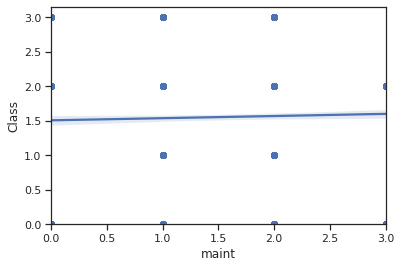

In [69]:
sb.regplot(x='maint',y='Class',data=full_tab)
plt.ylim(0,)

(0.0, 3.15)

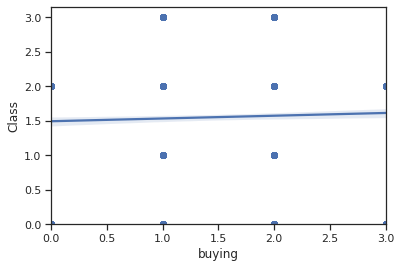

In [70]:
sb.regplot(x='buying',y='Class',data=full_tab)
plt.ylim(0,)

(0.0, 3.15)

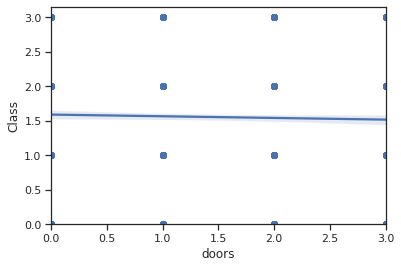

In [71]:
sb.regplot(x='doors',y='Class',data=full_tab)
plt.ylim(0,)

(0.0, 3.15)

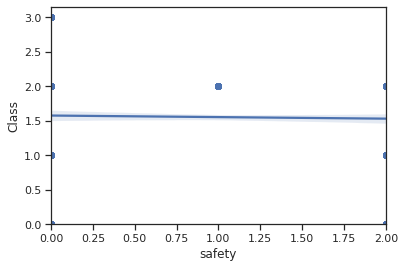

In [72]:
sb.regplot(x='safety',y='Class',data=full_tab)
plt.ylim(0,)

(0.0, 3.15)

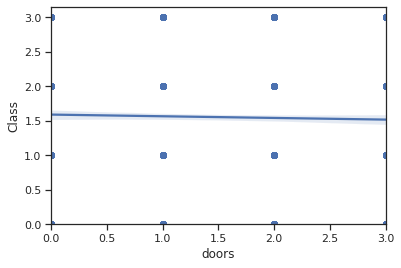

In [73]:
sb.regplot(x='doors',y='Class',data=full_tab)
plt.ylim(0,)

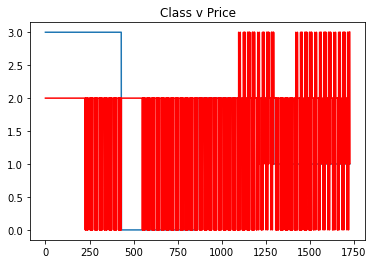

In [54]:
plt.plot(col_1)
plt.plot(col_2, c = 'red')
plt.title("Class v Price")
plt.show()

##testing

In [42]:
corr_matrix = Dep.corr()

In [44]:
df_dummy = pd.get_dummies(Dep)
Dep = pd.concat([Dep, df_dummy], axis = 1)

In [45]:
mask = np.zeros_like(corr_matrix, dtype=np.bool)

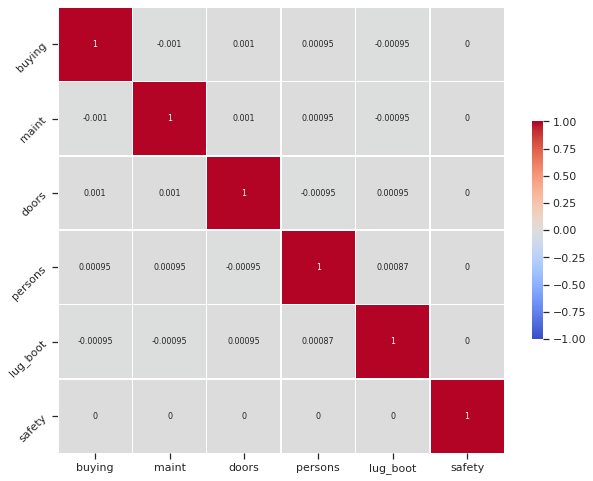

In [62]:
f, ax = plt.subplots(figsize=(10,10)) 
heatmap = sb.heatmap(corr_matrix, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 45)
ax.set_xticklabels(corr_matrix.columns)
sb.set_style({'xtick.bottom': True}, {'ytick.left': True})

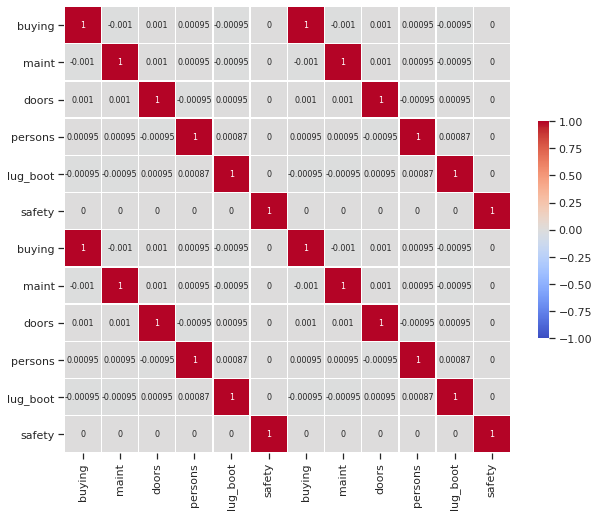

In [63]:
f, ax = plt.subplots(figsize=(10,10)) 
dataplot = sb.heatmap(Dep.corr(), 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                     cbar_kws = {'shrink': .4},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 8})